### Initialise

In [1]:
## Import necessary packages
import matplotlib.pyplot as plt; 
import pandas as pd; 
import numpy as np; 
import json; 
# from datetime import datetime; 

from sklearn.model_selection import train_test_split;
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import python.data as datameta

In [2]:
def mse(a,b): return (mean_squared_error(a,b)); 
def mae(a,b): return (mean_absolute_error(a,b)); 
def r2(a,b): return (r2_score(a,b)**0.5); 
def pct(val): return str(val*100)[:5]+"%"; 

def row(name,ytest, yhat, accuracies):
    return [
        name, 
        r2(ytest, yhat),mae(ytest, yhat),mse(ytest, yhat), 
        accuracies[0], accuracies[1], accuracies[2]
    ]; 

def accuracy(test,pred,tol): 
    checks = np.isclose(test,pred, rtol=tol); 
    acc = np.sum(checks)/len(checks); 
    
    return pct(acc);  

### Preprocess Data

In [3]:
data = datameta.processData('data/ashwin_data.csv'); 
data = data[5:]; 
data.head()

Index(['Time (h)_mean', 'Aeration rate(Fg:L/h)_mean',
       'Sugar feed rate(Fs:L/h)_mean', 'Acid flow rate(Fa:L/h)_mean',
       'Base flow rate(Fb:L/h)_mean', 'Air head pressure(pressure:bar)_mean',
       'Substrate concentration(S:g/L)_mean', 'Vessel Volume(V:L)_mean',
       'pH(pH:pH)_mean', 'Temperature(T:K)_mean',
       'PAA flow(Fpaa:PAA flow (L/h))_mean', 'Oil flow(Foil:L/hr)_mean',
       'Ammonia shots(NH3_shots:kgs)_mean', 'Water Flow_mean', 'Time (h)_std',
       'Aeration rate(Fg:L/h)_std', 'Sugar feed rate(Fs:L/h)_std',
       'Acid flow rate(Fa:L/h)_std', 'Base flow rate(Fb:L/h)_std',
       'Air head pressure(pressure:bar)_std',
       'Substrate concentration(S:g/L)_std', 'Vessel Volume(V:L)_std',
       'pH(pH:pH)_std', 'Temperature(T:K)_std',
       'PAA flow(Fpaa:PAA flow (L/h))_std', 'Oil flow(Foil:L/hr)_std',
       'Ammonia shots(NH3_shots:kgs)_std', 'Water Flow_std', 'Time (h)_max',
       'Aeration rate(Fg:L/h)_max', 'Sugar feed rate(Fs:L/h)_max',
       'A

,Time (h)_mean,Aeration rate(Fg:L/h)_mean,Sugar feed rate(Fs:L/h)_mean,Acid flow rate(Fa:L/h)_mean,Base flow rate(Fb:L/h)_mean,Air head pressure(pressure:bar)_mean,Substrate concentration(S:g/L)_mean,Vessel Volume(V:L)_mean,pH(pH:pH)_mean,Temperature(T:K)_mean,...,Air head pressure(pressure:bar)_min,Substrate concentration(S:g/L)_min,Vessel Volume(V:L)_min,pH(pH:pH)_min,Temperature(T:K)_min,PAA flow(Fpaa:PAA flow (L/h))_min,Oil flow(Foil:L/hr)_min,Ammonia shots(NH3_shots:kgs)_min,Water Flow_min,Penicillin concentration(P:g/L)
5,-0.988943,-0.636364,-0.918919,-1.0,-0.979929,-1.0,-0.977041,-0.900624,0.601878,-0.630605,...,-1.0,-0.977560,-0.900500,0.588995,-0.545966,-0.333333,-1.0,-1.0,-1.000000,-0.999945
6,-0.987560,-0.636364,-0.918919,-1.0,-0.926222,-1.0,-0.976512,-0.900675,0.587354,-0.631927,...,-1.0,-0.976990,-0.900500,0.588995,-0.545966,-0.333333,-1.0,-1.0,-0.999489,-0.999945
7,-0.986178,-0.636364,-0.918919,-1.0,-0.843149,-1.0,-0.976024,-0.900624,0.590825,-0.631927,...,-1.0,-0.976459,-0.900500,0.588995,-0.545966,-0.333333,-1.0,-1.0,-0.998362,-0.999945
8,-0.984796,-0.636364,-0.918919,-1.0,-0.768679,-1.0,-0.975580,-0.900505,0.609018,-0.631927,...,-1.0,-0.975970,-0.900449,0.594306,-0.545966,-0.333333,-1.0,-1.0,-0.996759,-0.999945
9,-0.983414,-0.636364,-0.918919,-1.0,-0.738246,-1.0,-0.975180,-0.900351,0.631953,-0.631927,...,-1.0,-0.975525,-0.900295,0.616582,-0.545966,-0.333333,-1.0,-1.0,-0.994791,-0.999945


In [4]:
# Split into x and y
# xkeys = [
#     "Time (h)", "Aeration rate(Fg:L/h)", "Sugar feed rate(Fs:L/h)","Acid flow rate(Fa:L/h)",
#     "Base flow rate(Fb:L/h)","Water Flow","Substrate concentration(S:g/L)","PAA flow(Fpaa:PAA flow (L/h))",
#     "Oil flow(Foil:L/hr)", "Ammonia shots(NH3_shots:kgs)",
#     # Converted variables
#     "Air head pressure(pressure:bar)", "Temperature(T:K)", "pH(pH:pH)", "Vessel Volume(V:L)"
# ]
ykeys = ["Penicillin concentration(P:g/L)"]; 
(x,y) = datameta.xy_split_y(data,ykeys); 
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.11); 
# ytest = ytest.to_numpy().flatten(); 


xtrain_mean = np.mean(xtrain, axis=0); 
xtrain_std = np.std(xtrain, axis=0) +1e-29; 

ytrain_mean = np.mean(ytrain, axis=0); 
ytrain_std = np.std(ytrain, axis=0) +1e-29; 

print(
    xtrain.shape,
    xtrain_mean.shape,
    xtrain_std.shape
)

print(
    ytrain.shape,
    ytrain_mean.shape,
    ytrain_std.shape
)

ytrain_mean = ytrain_mean.values.reshape(1,-1); 
xtrain_mean = xtrain_mean.values.reshape(1,-1); 
ytrain_std = ytrain_std.values.reshape(1,-1); 
xtrain_std = xtrain_std.values.reshape(1,-1); 

xtrain, xtest = (xtrain - xtrain_mean)/xtrain_std, (xtest - xtrain_mean)/xtrain_std; 
ytrain, ytest = (ytrain - ytrain_mean)/ytrain_std, (ytest - ytrain_mean)/ytrain_std; 

# SETUP ENDS HERE

x:  56  keys in  56 cols
y:  1  keys in  1 cols
(101393, 56) (56,) (56,)
(101393, 1) (1,) (1,)


In [5]:
model = DecisionTreeRegressor(); 
model.fit(xtrain,ytrain); 

print(
    f"Train: {pct(model.score(xtrain,ytrain))}\n",
    f"Test: {pct(model.score(xtest,ytest))}"
)

Train: 99.99%
 Test: 99.53%


(12532, 1) (12532, 1)
61.44%


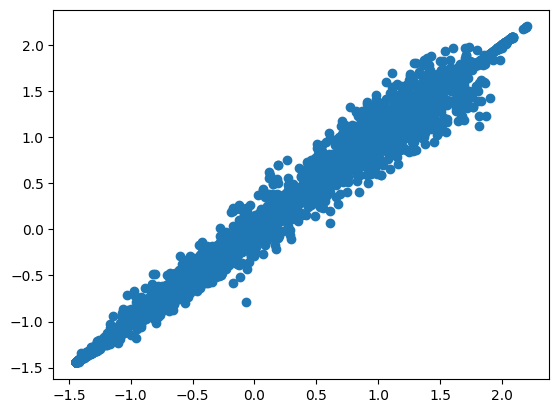

In [6]:
prediction= pd.DataFrame(model.predict(xtest));  
plt.scatter(ytest,prediction); 

print(ytest.shape, prediction.shape); 
print(accuracy(ytest, prediction, 0.01)); 

In [ ]:
parameters={
    "splitter":["best","random"],
    "max_depth" : [i for i in range(10,15)],
    "min_samples_leaf":[i for i in range(4,11)],
    "min_weight_fraction_leaf":[0.0, 0.1],
    "max_leaf_nodes":[i*10 for i in range(6,12)]
}

In [ ]:
from sklearn.model_selection import GridSearchCV; 

tuning_model=GridSearchCV(model,param_grid=parameters,scoring='neg_root_mean_squared_error',cv=3, n_jobs=-1,verbose=2)

tuning_model.fit(x, y)

In [ ]:
print(tuning_model)
print("BEST: ",tuning_model.best_params_, tuning_model.best_score_)
results = pd.DataFrame(tuning_model.cv_results_)
results.sort_values(by='rank_test_score', inplace=True)
configs = results[:15]["params"].to_numpy().tolist()
configs = json.dumps(configs)
print(configs)

file = open("data/dtr_cfgs.json", "w+")
content = str(configs)
file.write(content)
file.close()

In [ ]:
# RUN FROM HERE
file = open("data/dtr_cfgs.json", "r")
content = file.read()
file.close()
configs = json.loads(content); 

for dict in configs:
    for key,value in enumerate(dict):
        if value=="null": 
            dict[key] = None; 

In [ ]:
table = [0 for _ in range(len(configs))]

# configs.append({})
for index,config in enumerate(configs):
    print(f"Running: {config}")
    tmodel = DecisionTreeRegressor(**config); 
    tmodel.fit(xtrain,ytrain); 

    yhat = pd.DataFrame(tmodel.predict(xtest))

    accuracies = list(map(
        lambda x: accuracy(yhat, ytest, x)
    ,[0.005, 0.01, 0.1])) 
    print(
        ytest.shape,    
        yhat.shape
    )

    table[index] = row(json.dumps(config), ytest, yhat, accuracies)

table = pd.DataFrame(table, columns=["","R2","MAE", "MSE","Acc@0.1%", "Acc@1%", "Acc@10%"]); 
table

In [ ]:
table = [0]

model = DecisionTreeRegressor(); 
model.fit(xtrain,ytrain); 

yhat = pd.DataFrame(model.predict(xtest))

accuracies = list(map(
    lambda x: accuracy(yhat, ytest, x)
,[0.001, 0.01, 0.1])) 
print(f"Accuracies: {accuracies}")
table[0] = row(json.dumps(config), ytest , model.predict(xtest), accuracies)


In [ ]:
print(xtrain.keys())
plt.hist(xtrain["Vessel Volume(V:L)"], bins=100)


In [ ]:
plt.hist(yhat, bins=100)


In [ ]:
plt.hist(ytest, bins=100)